# Введение в задачу классификации.<br>Постановка задачи и подготовка данных.


**План занятия**

* [Теоретическая часть](#theory)
    * [Метрики качества](#metrics)
* [Практическая часть](#practice)
    * [Постановка задачи](#task)
    * [Загрузка данных](#load_data)
    * [Приведение типов](#cast)
    * [Обзор данных](#review)    
    * [Обработка пропусков](#gaps)
    * [Обработка выбросов](#outliers)
    * [Построение новых признаков](#new_features)
    * [Сохранение обучающего датасета](#saving)
    * [Обучение модели](#training)
    * [Подсчет метрик](#count_metrics)

### Метрики качества<a class="anchor" id="metrics"></a>

*Пример*

У нас есть выборка из 13 животных, из которых 8 - кошки и 5 - другие животные.

**Accuracy (доля правильных ответов)**

*Accuracy* - доля правильных ответов отражает процент объектов, для которых классы были определены верно, среди всего множества объектов.

<center>$\large accuracy = \LARGE \frac{T}{N} = \frac{TP \: + \: TN}{TP \: + \: TN \: + \: FP \: + \: FN}$<center>

$T$ - количество объектов, для которых классы были определены верно<br>
$N$ - общее количество объектов

**Проблемы accuracy:**<br>
    
    1) Дисбаланс классов
    
    кот - 950 наблюдений
    голубь - 50 наблюдений
    a(x) = кот

    accuracy?

    2) Ошибки могут иметь разную цену
<img src='images/scoring.png' width=400px>

**Confusion matrix (матрица ошибок)**

<img src="images/confusion_matrix.jpg">

Positive - алгоритм предсказал, что объект относится к "основному" классу.
* True Positive (TP) - истино-положительное решение, алгоритм предсказал, что объект относится к "основному" классу и оказался прав.
* False Positive (FP) - ложно-положительное решение, алгоритм предсказал, что объект относится к "основному" классу и ошибся.

Negative - алгоритм предсказал, что объект относится к "альтернативному" классу.
* True Negative (TN) - истино-отрицательное решение, алгоритм предсказал, что объект относится к "альтернативному" классу и оказался прав.
* False Negative (FN) - ложно-отрицательное решение, алгоритм предсказал, что объект относится к "альтернативному" классу и ошибся.

Исходя из этой нотации, получается, что 7 животных алгоритм классифицировал верно (5 - кошек и 2 - других вида), а в 6 случаях ошибся (алгоритм не распознал 3 кошки, а 3 других вида животных наоборот принял за кошек).

_______________
<center><b>Вопрос.</b> Сколько значений True Positive относительно второго класса?</center>


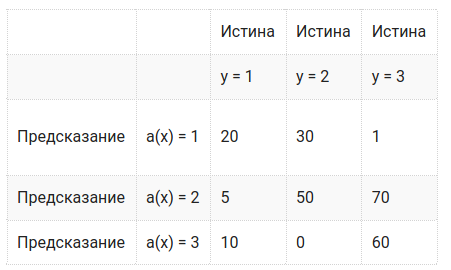
________________

**Precision (точность) & Recall (полнота)**

*Precision* - точность отражает какой процент объектов, отнесённых к "основному" классу, действительно являются таковыми.

*Recall* - полнота отражает какой процент объектов "основного" класса было обнаружено алгоритмом.

<center>$\large precision = \LARGE \frac{TP}{TP \: + \: FP} \:\:\:\:\: \large recall = \LARGE \frac{TP}{TP \: + \: FN}$<center>

<img src="images/prec_vs_recall.png">

_______________
<center><b>Вопрос.</b> Посчитайте метрики precision и recall относительно первого класса.</center>


 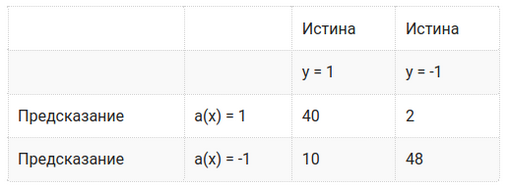
 _______________

**F-score (F-мера, гармоническое среднее)**

*F-score* - метрика объединяющая в себе точность и полноту, выдавая как результат их гармоническое среднее, а коэффициент $\beta$, позволяет балансировать вклад, вносимый точностью, тем самым акцентируя внимание на той метрике, максимизация которой для нас наиболее приоритетна.

Наиболее часто встречающаяся вариация данной метрики - это F1-score,<br> Если $\beta$ = 1, а влияние точности и полноты одинаково.<br>Если $\beta$ > 1 - смещение в сторону recall.<br>Если 0 < $\beta$ < 1 - смещение в сторону precision

<center>$\LARGE F_{\beta} = (1+ \beta^2) \cdot \frac{precision \: \cdot \: recall}{(\beta^2 \cdot precision) \: + \: recall}$<center>

Примеры:
1. Атомная электростанция, наш / не наш человек - максимизируем точность
2. Больница, болен / здоров - максимизируем полноту

______________
<center><b>Вопрос.</b>  Сколько ложно-положительных (FP) срабатываний относительно первого класса?</center>

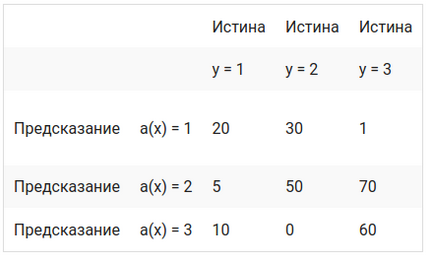
_______________

**PR-кривая**

<img src="images/data.png" width=300px>
<img src="images/cutoff_05.jpg" height=300px>
<img src="images/cutoff_03.jpg" height=300px>
<img src="images/cutoff_08.jpg" height=300px>

Графичекая характеристика качества бинарного классификатора, отображает зависимость изменения точности алгоритма от его полноты.

<img src="images/pr-curve.png">

**ROC-кривая + ROC-AUC**

Графичекая характеристика качества бинарного классификатора, отображает зависимость доли верных положительных классификаций *True Positive Rate (TPR)* от доли ложных положительных классификаций *False Positive Rate (FPR)*.

<center>$\large TPR = \LARGE \frac{TP}{TP \: + \: FN} \:\:\:\:\: \large FPR = \LARGE \frac{FP}{FP \: + \: TN}$<center>

<img src="images/roc-curve.png">


_________________
### <center>PR-кривая</center>
<img src="images/pr-curve-example.png" width=600px>

### <center>ROC-кривая</center>
<img src="images/roc-curve-example.png" width=600px>

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

- - - 

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)

**Пути к директориям и файлам**

In [6]:
DATASET_PATH = './data/credit_default.csv'

### Загрузка данных<a class="anchor" id="load_data"></a>

In [7]:
df = pd.read_csv(DATASET_PATH, sep=';')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,Female,2,не женат/не замужем,24,65542.0,28311.0,23978.0,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,Female,3,женат/замужен,46,33100.0,32319.0,31499.0,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,Female,2,женат/замужен,41,1650.0,0.0,0.0,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,Female,2,не женат/не замужем,35,97268.0,71876.0,50043.0,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,Female,1,женат/замужен,35,41730.0,40764.0,46281.0,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


### Приведение типов<a class="anchor" id="cast"></a>

In [8]:
for colname in ['SEX', 'EDUCATION', 'MARRIAGE']:
    df[colname] = df[colname].astype(str)

In [9]:
df.dtypes

LIMIT_BAL             float64
SEX                    object
EDUCATION              object
MARRIAGE               object
AGE                     int64
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
NEXT_MONTH_DEFAULT      int64
dtype: object

### Обзор данных<a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [10]:
df['NEXT_MONTH_DEFAULT'].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

**Обзор количественных признаков**

In [11]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,168182.000000,35.39600,51490.560500,49298.972000,47292.40850,43605.665800,40347.829700,38996.784300,5511.82970,5.931217e+03,5385.050600,4585.585700,4712.134300,5055.019400,0.219500
std,130118.668771,9.19536,74906.094564,71808.952137,69398.13263,65062.788893,61044.676044,59682.999879,14748.85889,2.204220e+04,18527.041096,14066.147593,14080.847065,17359.210922,0.413929
min,10000.000000,21.00000,-11545.000000,-24704.000000,-157264.00000,-65167.000000,-23003.000000,-339603.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.00000,3388.000000,3016.500000,2561.75000,2400.000000,1703.250000,1300.750000,1000.00000,7.492500e+02,390.000000,277.250000,300.000000,150.750000,0.000000
50%,140000.000000,34.00000,22896.500000,21576.000000,20370.50000,19194.000000,18261.000000,17338.000000,2163.50000,2.001000e+03,1800.000000,1500.000000,1543.000000,1500.000000,0.000000
75%,240000.000000,41.00000,67834.750000,64243.500000,60783.25000,55731.250000,50491.000000,49696.000000,5001.00000,5.000000e+03,4651.500000,4014.250000,4100.000000,4000.000000,0.000000
max,1000000.000000,75.00000,964511.000000,983931.000000,689643.00000,891586.000000,927171.000000,961664.000000,493358.00000,1.227082e+06,896040.000000,432130.000000,417990.000000,422000.000000,1.000000


**Обзор номинативных признаков**

* **SEX** - Пол
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение

In [12]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

SEX

Female    6068
Male      3932
Name: SEX, dtype: int64
****************************************************************************************************

EDUCATION

2    4678
1    3496
3    1674
5      90
4      42
6      18
0       2
Name: EDUCATION, dtype: int64
****************************************************************************************************

MARRIAGE

не женат/не замужем    5332
женат/замужен          4547
прочее                  108
0                        13
Name: MARRIAGE, dtype: int64
****************************************************************************************************



### Обработка пропусков<a class="anchor" id="gaps"></a>

In [13]:
df.isna().sum()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
NEXT_MONTH_DEFAULT    0
dtype: int64

### Обработка выбросов<a class="anchor" id="outliers"></a>

**EDUCATION**

In [14]:
df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = df['EDUCATION'].mode()[0]

**MARRIAGE**

In [15]:
df.loc[df['MARRIAGE'] == '0', 'MARRIAGE'] = df['MARRIAGE'].mode()[0]

### Построение новых признаков<a class="anchor" id="new_features"></a>

**Dummies**

In [16]:
df['SEX'] = df['SEX'].map({'Female':'1', 'Male':'0'}).astype(int)

In [18]:
for cat_colname in df.select_dtypes(include='object').columns[1:]:
    df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)

In [19]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT,MARRIAGE_женат/замужен,MARRIAGE_не женат/не замужем,MARRIAGE_прочее
0,150000.0,1,2,не женат/не замужем,24,65542.0,28311.0,23978.0,17853.0,34527.0,...,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0,0,1,0
1,50000.0,1,3,женат/замужен,46,33100.0,32319.0,31499.0,30748.0,30162.0,...,0.0,0.0,0.0,0.0,3100.0,798.0,1,1,0,0
2,150000.0,1,2,женат/замужен,41,1650.0,0.0,0.0,6784.0,6923.0,...,0.0,0.0,6784.0,159.0,167.0,760.0,0,1,0,0
3,150000.0,1,2,не женат/не замужем,35,97268.0,71876.0,50043.0,55182.0,48983.0,...,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0,0,1,0
4,70000.0,1,1,женат/замужен,35,41730.0,40764.0,46281.0,47026.0,45971.0,...,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0,1,0,0


In [20]:
df = df.drop(columns=['MARRIAGE'])

### Обучение модели<a class="anchor" id="training"></a>

In [21]:
X = df.drop(columns='NEXT_MONTH_DEFAULT')
y = df['NEXT_MONTH_DEFAULT']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2)
X_train.shape, X_test.shape

((8000, 19), (2000, 19))

In [23]:
%%time
tree = DecisionTreeClassifier(random_state=1)

param_grid=[{
             'max_depth': range(1, 7), 
             'min_samples_leaf': range(1, 7), 
            }]

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
tree = grid_search.best_estimator_

CPU times: user 10.4 s, sys: 19.4 ms, total: 10.4 s
Wall time: 10.5 s


In [24]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 4}

In [25]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

pred_proba_test = tree.predict_proba(X_test)
pred_proba_test[:5]

array([[0.85074627, 0.14925373],
       [0.71806167, 0.28193833],
       [0.85175879, 0.14824121],
       [0.85175879, 0.14824121],
       [0.74385704, 0.25614296]])

### Подсчет метрик <a class="anchor" id="count_metrics"></a>

In [26]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print(f'Accuracy на трейне {accuracy_train}')
print(f'Accuracy на тесте {accuracy_test}')

Accuracy на трейне 0.798375
Accuracy на тесте 0.794


In [27]:
print(confusion_matrix(y_test, pred_test))

[[1534   53]
 [ 359   54]]


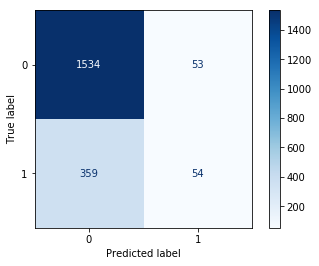

In [28]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues);

In [29]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1587
           1       0.50      0.13      0.21       413

    accuracy                           0.79      2000
   macro avg       0.66      0.55      0.54      2000
weighted avg       0.75      0.79      0.74      2000



__________
### Micro, Macro, Weighted

In [47]:
from sklearn.metrics import f1_score, precision_score, recall_score, \
                            classification_report, confusion_matrix, accuracy_score, f1_score

In [48]:
true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pred = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]

In [49]:
confusion_matrix(true, pred)

array([[4, 1],
       [5, 5]])

**MICRO**

In [50]:
precision = 9 / 15
precision, accuracy_score(true, pred)

(0.6, 0.6)

In [51]:
recall = 9 / 15
recall, accuracy_score(true, pred)

(0.6, 0.6)

In [52]:
2 * (precision * recall) / (precision + recall)

0.6

In [53]:
f1_score(true, pred, average='micro')

0.6

**MACRO**

In [54]:
precision_0 = 4 / (4 + 5)
precision_1 = 5 / (5 + 1)
macro_pr = (precision_1 + precision_0) / 2
macro_pr

0.6388888888888888

In [55]:
precision_score(true, pred, average='macro')

0.6388888888888888

In [56]:
recall_1 = 5 / (5 + 5)
recall_0 = 4 / (4 + 1)
macro_rec = (recall_1 + recall_0) / 2
macro_rec

0.65

In [57]:
recall_score(true, pred, average='macro')

0.65

In [58]:
# 1 способ
f_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
f_score = (f_score_0 + f_score_1) / 2
f_score_0, f_score_1, f_score

(0.5714285714285714, 0.625, 0.5982142857142857)

In [59]:
# 2 способ
2 * (macro_rec * macro_pr) / (macro_pr + macro_rec) 

0.6443965517241379

In [60]:
f1_score(true, pred, average='macro')

0.5982142857142857

**WEIGHTED**

In [61]:
zero = true.count(0)
one = true.count(1)
size = len(true)

In [62]:
zero / size * precision_0 + one / size * precision_1

0.7037037037037037

In [63]:
precision_score(true, pred, average='weighted')

0.7037037037037038

In [64]:
zero / size * recall_0 + one / size * recall_1

0.6

In [65]:
recall_score(true, pred, average='weighted')

0.6

In [66]:
f_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
zero / size * f_score_0  + one / size * f_score_1

0.6071428571428571

In [67]:
f1_score(true, pred, average='weighted')

0.6071428571428572

_________

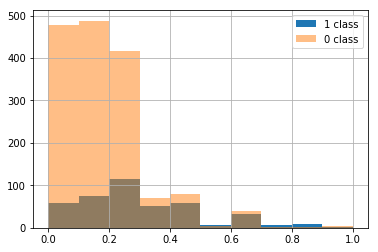

In [48]:
pd.Series(pred_proba_test[:, 1][y_test == 1]).hist(label='1 class');
pd.Series(pred_proba_test[:, 1][y_test == 0]).hist(alpha=0.5, label='0 class');
plt.legend()

In [58]:
pred_test = np.where(pred_proba_test[:, 1] >= 1, 1, 0)

In [59]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1587
           1       0.20      0.00      0.00       413

    accuracy                           0.79      2000
   macro avg       0.50      0.50      0.44      2000
weighted avg       0.67      0.79      0.70      2000



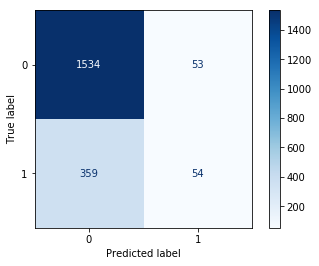

In [35]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues);

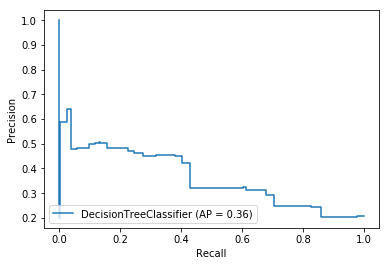

In [36]:
plot_precision_recall_curve(tree, X_test, y_test);

In [37]:
precision_recall_curve(y_test, pred_proba_test[:, 1])

(array([0.2065    , 0.20582329, 0.20618034, 0.20528455, 0.24265208,
        0.24542897, 0.24836125, 0.29305136, 0.29268293, 0.31187569,
        0.3251928 , 0.3221216 , 0.42142857, 0.4498645 , 0.45014245,
        0.45375723, 0.45172414, 0.4496124 , 0.46341463, 0.47222222,
        0.48186528, 0.50387597, 0.50925926, 0.5046729 , 0.5       ,
        0.48192771, 0.48      , 0.64      , 0.58823529, 0.2       ,
        1.        ]),
 array([1.        , 0.99273608, 0.98547215, 0.97820823, 0.85956416,
        0.84503632, 0.82566586, 0.70460048, 0.69733656, 0.68038741,
        0.6125908 , 0.60290557, 0.42857143, 0.40193705, 0.38256659,
        0.38014528, 0.31719128, 0.28087167, 0.27602906, 0.24697337,
        0.2251816 , 0.15738499, 0.13317191, 0.13075061, 0.11622276,
        0.0968523 , 0.05811138, 0.03874092, 0.02421308, 0.00242131,
        0.        ]),
 array([0.        , 0.03030303, 0.06666667, 0.09026369, 0.10144928,
        0.14563107, 0.14824121, 0.14925373, 0.15309446, 0.22770398,
    

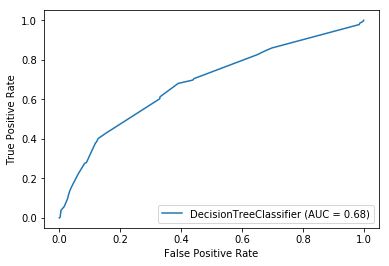

In [38]:
plot_roc_curve(tree, X_test, y_test);

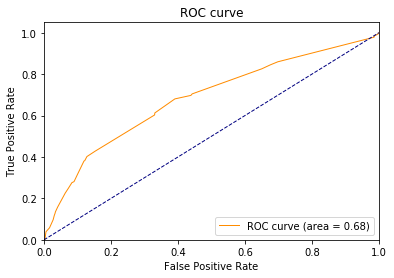

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## Домашняя работа 
(если хочешь конечно)
1. Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.